In [2]:
!pip install networkx matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 4.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 4.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 3.7 MB/s eta 0:00:0000:0100:01
  Using cached kiwisolver-1.4.5-cp311-cp311-macosx_11_0_arm64.whl (66 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 2.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 4.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 15.8 MB/s eta 0:00:00


In [3]:
# Importamos las librerías para trabajar con BFS(Breadth-First Search)
# Búsqueda en amplitud

import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

In [3]:
# Definimos el grafo como un diccionario de listas de adyacencia
grafo = {
    'A': ['B', 'C'],
    'B': ['A', 'D'],
    'C': ['A'],
    'D': ['B']
}

# Nodo de inicio y nodo objetivo
nodo_inicio = 'A'
nodo_objetivo = 'D'

In [4]:
# Definimos nuestro algoritmo de búsqueda:

def busqueda_amplitud(grafo, inicio, objetivo):
    # El método set crea un conjunto de datos SIMILAR a una lista pero que
    # NO puede tener elementos duplicados
    visitados = set()
    # (Doubly Ended Queue) Es un tio de lista que permite agregar y eliminar
    # elementos ya sea a la izquiera o a la derecha de la misma
    cola = deque([(inicio, [inicio])])

    i = 1
    while cola:
        # Aquí removemos el primer elemento del set (El de la izquierda)
        # y este será nuestro nodo actual, el resto, el camino (Path restante)
        nodo_actual, camino = cola.popleft()
        print("\nIteración:", i)
        print("Nodo actual:", nodo_actual)
        
        if nodo_actual == objetivo:
            print("Camino encontrado:", "->".join(camino))
            return camino
        
        if nodo_actual not in visitados:
            visitados.add(nodo_actual)
            print("Nodos visitados", visitados)
            for vecino in grafo[nodo_actual]:
                if vecino not in visitados:
                    nueva_ruta = camino + [vecino]
                    print("Nueva ruta:", nueva_ruta)
                    cola.append((vecino, nueva_ruta))
        i += 1
    print("No se encontró un camino al nodo objetivo.")
    return None

In [5]:
# Realizamos la búsqueda en amplitud
camino = busqueda_amplitud(grafo, nodo_inicio, nodo_objetivo)


Iteración: 1
Nodo actual: A
Nodos visitados {'A'}
Nueva ruta: ['A', 'B']
Nueva ruta: ['A', 'C']

Iteración: 2
Nodo actual: B
Nodos visitados {'B', 'A'}
Nueva ruta: ['A', 'B', 'D']

Iteración: 3
Nodo actual: C
Nodos visitados {'B', 'C', 'A'}

Iteración: 4
Nodo actual: D
Camino encontrado: A->B->D


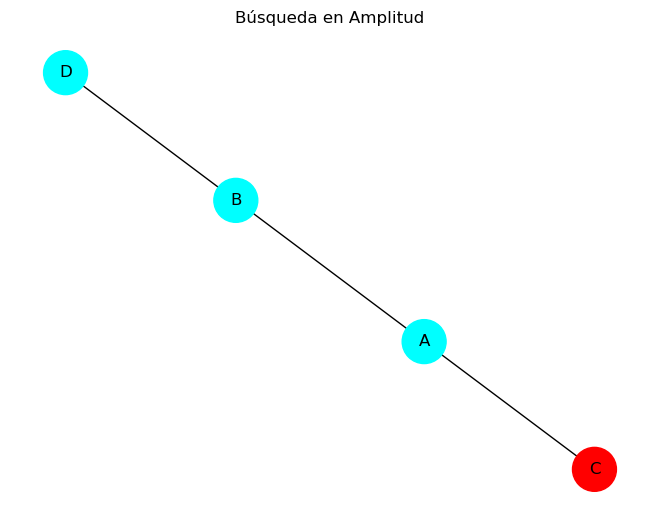

In [7]:
# Creamos el gráfico
G = nx.Graph(grafo)

# Coloreamos los nodos según si están en el camino o no
colores = ['cyan' if nodo in camino else 'red' for nodo in G.nodes()]

# Dibujamos el grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=colores, node_size=1000)
plt.title("Búsqueda en Amplitud")
plt.show()